<a href="https://colab.research.google.com/github/olvad/ML_course_openEdu/blob/main/Homeworks/HW2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [ ]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

n_neighbors = range(1, 21)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbors), cv=KFold(n_splits=5, random_state=10, shuffle = True))
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


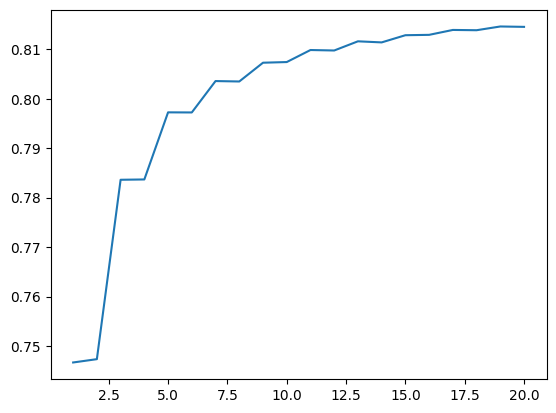

In [ ]:
def train_grid_search(X, y):
  param_grid = {'n_neighbors': np.arange(1, 21)}
  kf = KFold(n_splits=5, random_state=10, shuffle=True)
  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf, scoring='accuracy')
  grid_search.fit(X, y)
  return grid_search.cv_results_['mean_test_score']


mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_score = train_grid_search(X, y)
  mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [ ]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

--2024-07-03 08:42:49--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-07-03 08:42:50 ERROR 403: Forbidden.

--2024-07-03 08:42:50--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-07-03 08:42:50 ERROR 403: Forbidden.

mv: cannot stat 'train-images-idx3-ubyte.gz': No such file or directory
mv: cannot stat 'train-labels-idx1-ubyte.gz': No such file or directory


In [ ]:
from mnist import MNIST
from matplotlib import pyplot as plt
import numpy as np
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

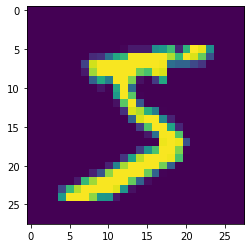

In [ ]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=10)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy